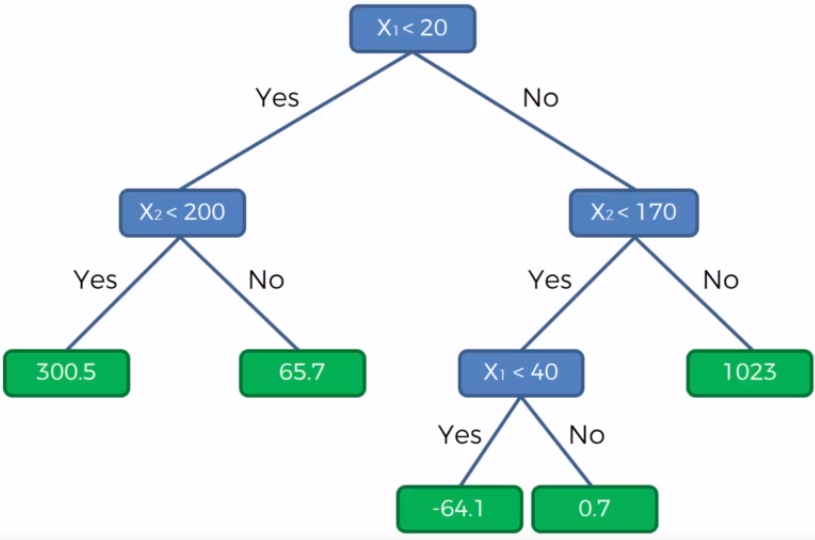

Source :-https://miro.medium.com/max/1400/1*XZ220vTa7rN8ccJZZNe09w.png

# About Data and Objective


we will use  Decision Trees to build a regressor & Grid Search to find the optimal value for the hyperparameters for the given dataset,
and evaluate the model on the appropriate metrics try and predict gas consumption.
    
    
Gas Tax (in cents)

Per Capita Income (dollars)

Paved Highways (in miles) &

The proportion of the population with a driver license.

# Importing Packages

In [6]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
from pandas import DataFrame
import pylab as pl
import numpy as np
from sklearn import tree
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df=pd.read_csv('petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


# Structure and Datatypes of Dataset along with Summary Statistics

In [8]:
print(df.shape)
df.info()

(48, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [9]:
pd.options.display.float_format = '{:.4f}'.format
data_summary=df.describe()
data_summary.T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0000,7.6683,0.9508,5.0000,7.0000,7.5000,8.1250,10.0000
Average_income,48.0000,4241.8333,573.6238,3063.0000,3739.0000,4298.0000,4578.7500,5342.0000
Paved_Highways,48.0000,5565.4167,3491.5072,431.0000,3110.2500,4735.5000,7156.0000,17782.0000
Population_Driver_licence(%),48.0000,0.5703,0.0555,0.4510,0.5298,0.5645,0.5952,0.7240
Petrol_Consumption,48.0000,576.7708,111.8858,344.0000,509.5000,568.5000,632.7500,968.0000


# Checking for Outliers

In [10]:
for k, v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column Petrol_tax outliers = 4.17%
Column Average_income outliers = 0.00%
Column Paved_Highways outliers = 4.17%
Column Population_Driver_licence(%) outliers = 2.08%
Column Petrol_Consumption outliers = 4.17%


<AxesSubplot:>

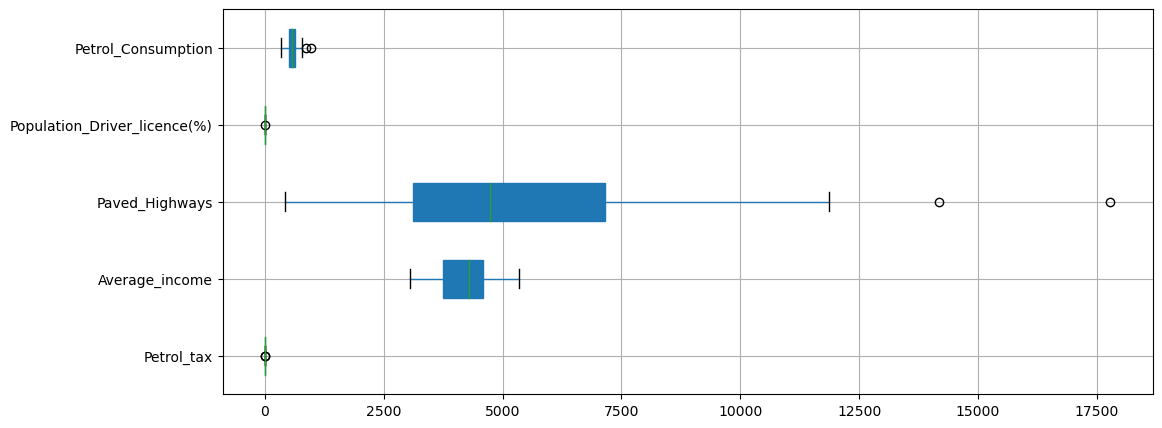

In [11]:
plt.figure(figsize=(12,5))
df.boxplot(patch_artist=True,vert=False)

# Correlation Chart


In [12]:
my_df=df.corr()
my_df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.0000,0.0127,-0.5221,-0.2880,-0.4513
Average_income,0.0127,1.0000,0.0502,0.1571,-0.2449
Paved_Highways,-0.5221,0.0502,1.0000,-0.0641,0.0190
Population_Driver_licence(%),-0.2880,0.1571,-0.0641,1.0000,0.6990
Petrol_Consumption,-0.4513,-0.2449,0.0190,0.6990,1.0000


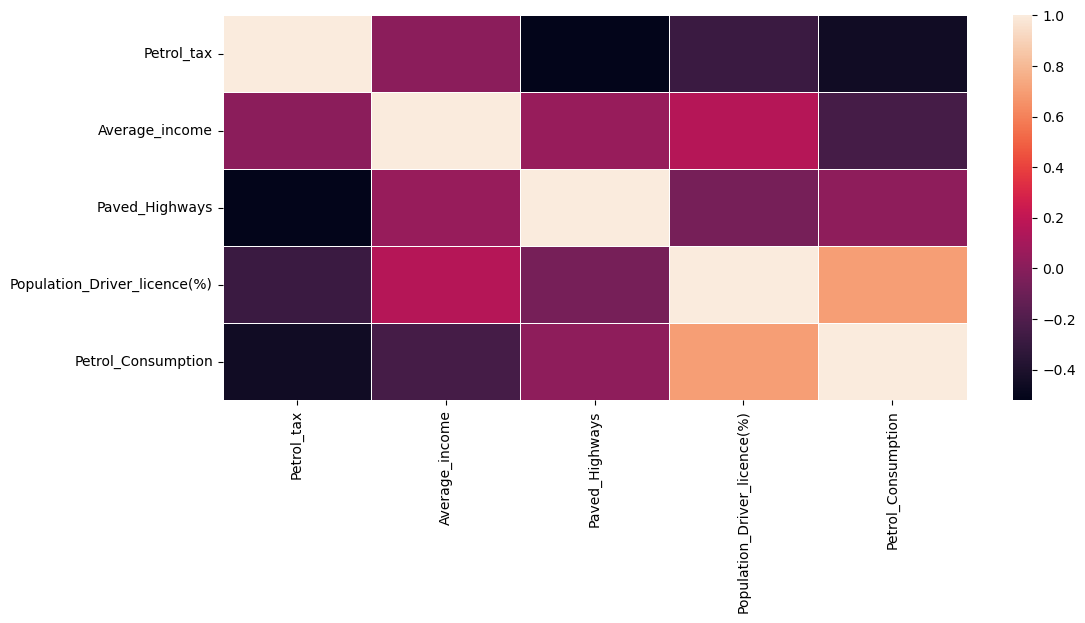

In [13]:
plt.figure(figsize=(12,5))
sns.heatmap(my_df,linewidth=0.5)
plt.show()

# Dividing Data into Predictors and Target Variables

In [14]:
predictor_var= df[['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)']] 

target_var= df['Petrol_Consumption']

In [15]:
predictor_var.shape

(48, 4)

In [16]:
target_var.shape

(48,)

# Importing Test Train Split from sklearn package

In [1]:
from sklearn.model_selection import train_test_split

train_test_split will return 4 different parameters. We will name them:X_train, X_test, y_train, y_test

The train_test_split will need the parameters: X, y, test_size=0.3, and random_state=123.

The X and y are the arrays required before the split, the test_size represents the ratio of the testing dataset, 
and the random_state ensures that we obtain the same splits.


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(predictor_var,target_var, test_size=0.30, random_state=123)

 # Decision Tree algorithm for regression with max depth 2

In [18]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=2,max_features=4)
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)
df_pred1=pd.DataFrame({'Actual':Y_test, 'Predicted':predictions})
df_pred1.head(5)

,Actual,Predicted
18,865,676.0000
13,508,676.0000
26,577,573.0000
31,554,676.0000
10,580,466.4286


In [19]:
# Evaluating the Prediction Accuracy

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test,predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test,predictions)))
print('r2_score:', metrics.r2_score(Y_test,predictions))



Mean Absolute Error: 89.49523809523811
Mean Squared Error: 14192.10289115646
Root Mean Squared Error: 119.13061273726608
r2_score: 0.38598994453140356


#### To plot feautre importance of the Decision Tree when max depth = 2

Text(0.5, 1.0, 'Feature Importance')

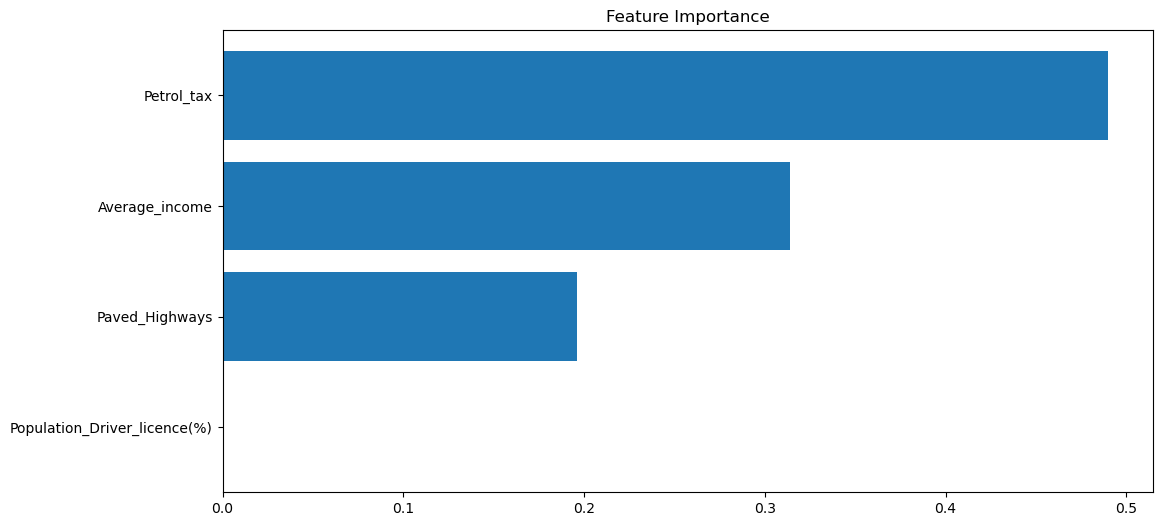

In [20]:
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


### Decision tree at Max Depth =2  

Tune the max depth and see the differences

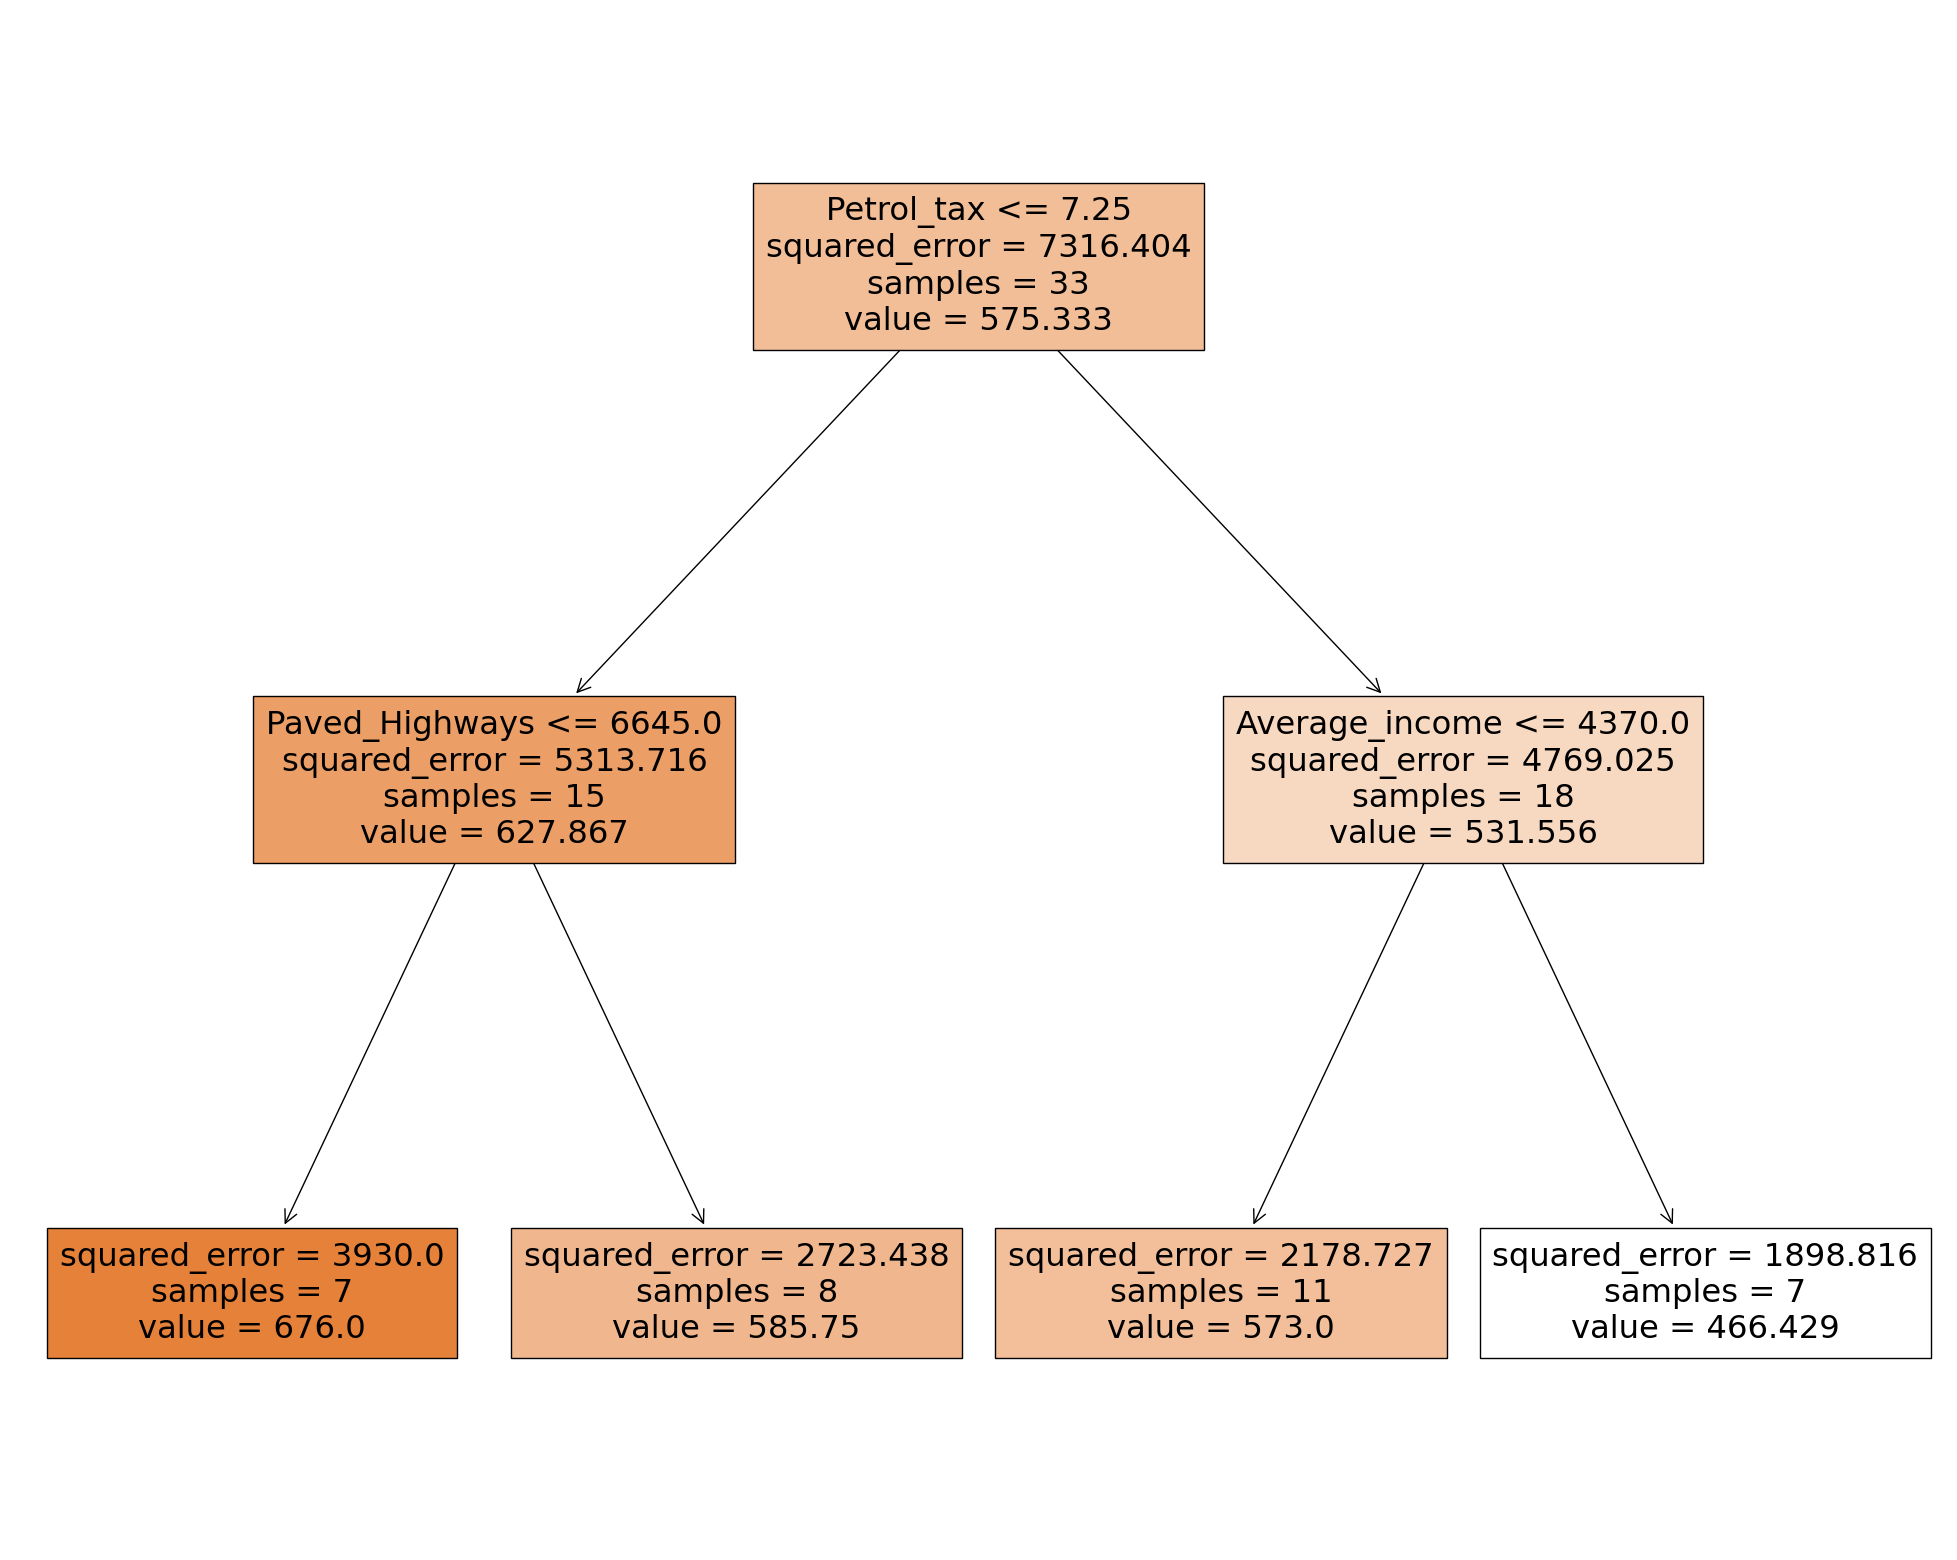

In [21]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=predictor_var.columns, filled=True)